Exercise 1.1

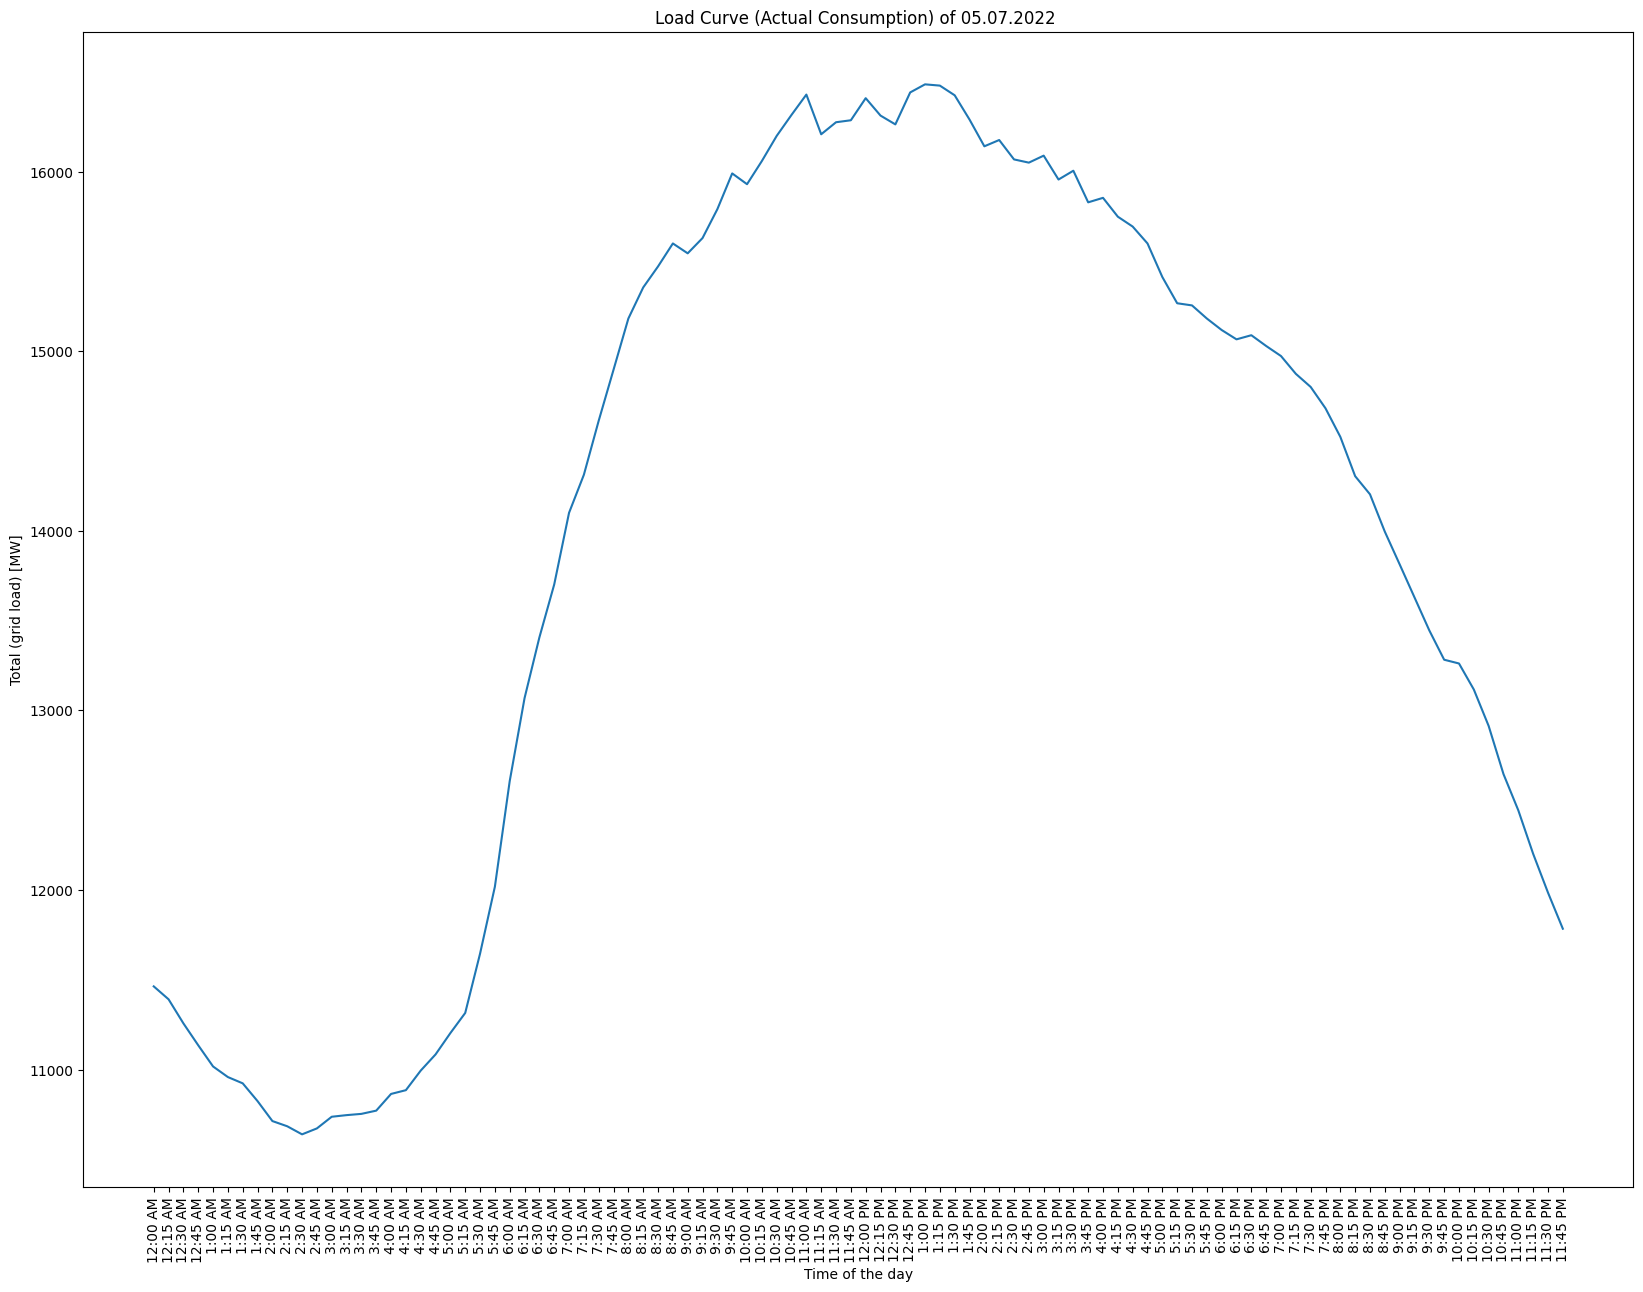

In [4]:
"""PLOT THE LOAD CURVE"""

import pandas as pd
import matplotlib.pyplot as plt

var = pd.read_excel("ActualConsumption_05072022.xlsx") #read the excel data file

x = list(var['Time'])   #take x values
y = list(var['Grid Load(MW)']) #take y values

"""Plotting the Graph"""
plt.figure(figsize = (20,15))
plt.plot(x,y)
plt.title("Load Curve (Actual Consumption) of 05.07.2022 ")
plt.xlabel("Time of the day")
plt.ylabel("Total (grid load) [MW]")
plt.xticks(rotation=90)
plt.show()

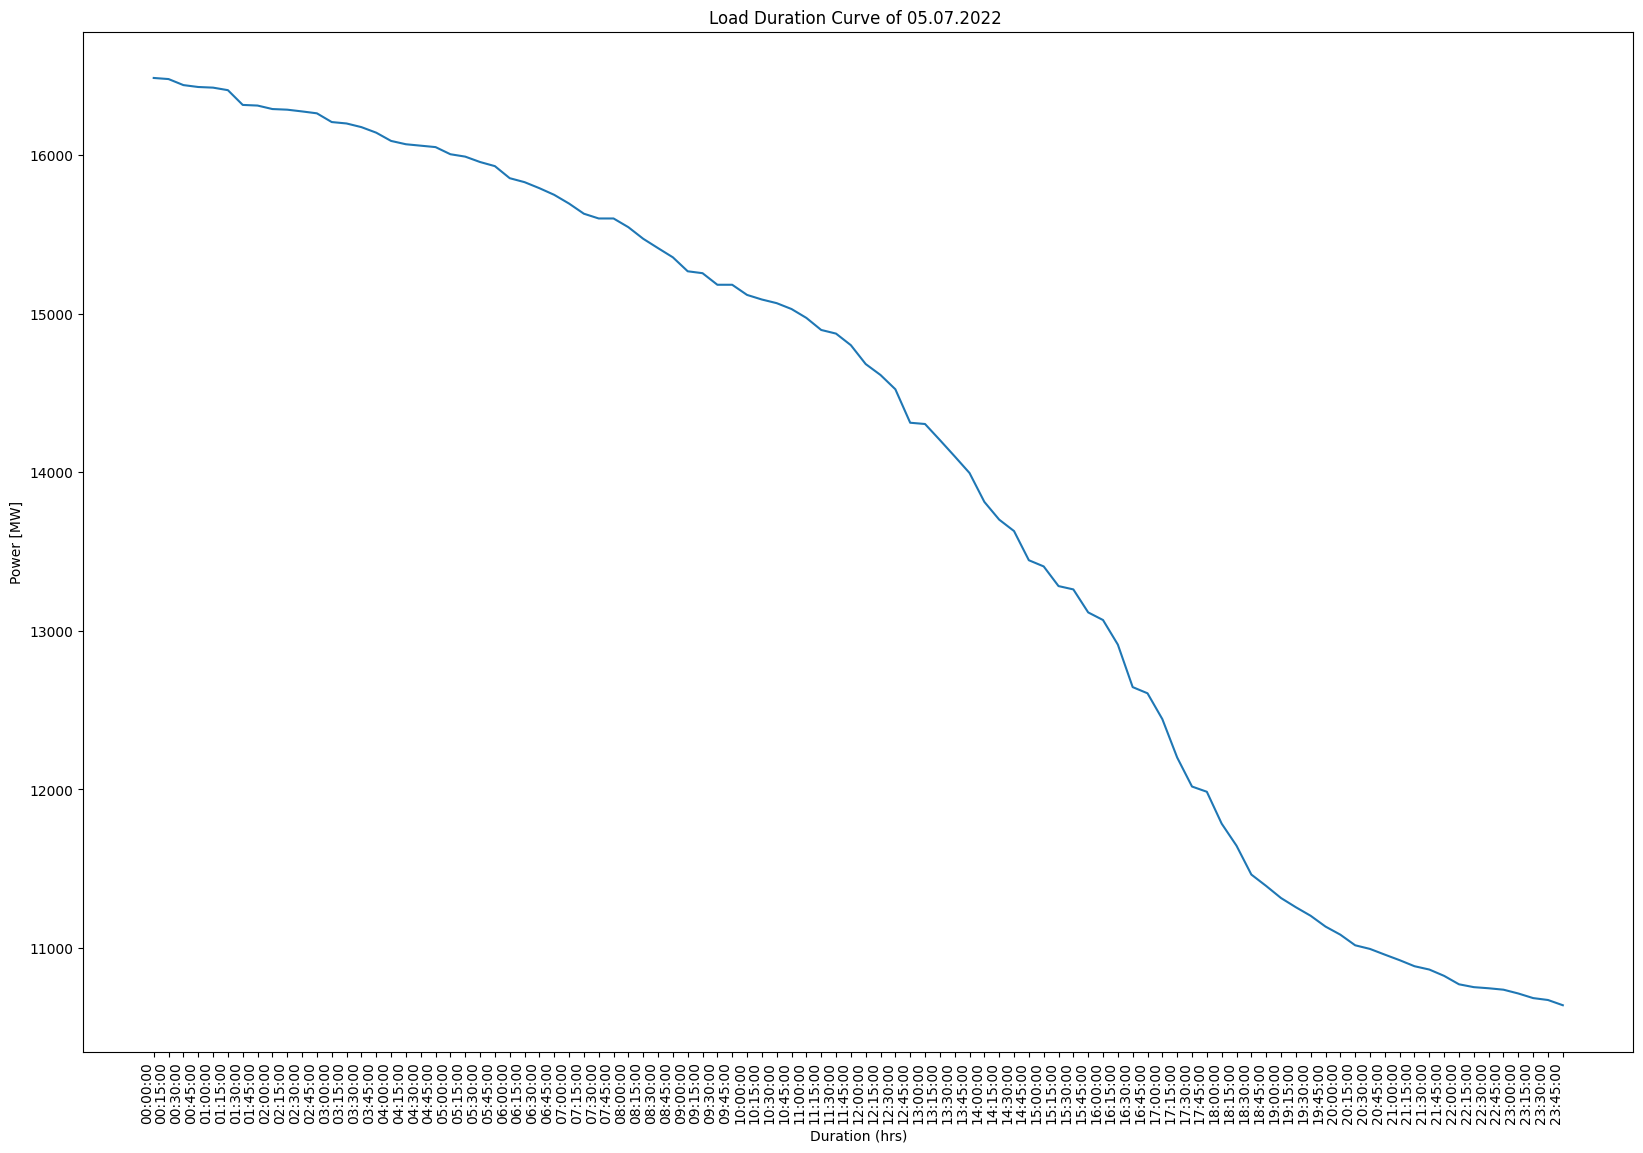

In [5]:
"""PLOT THE DURATION CURVE"""
import datetime
from datetime import time

load_Data = pd.read_excel("ActualConsumption_05072022.xlsx") #read the excel data file
load_Data['Interval'] = 0.25 #make the time interval of the data collection as 1/4 hr
load_Data_sorted = load_Data.sort_values(by=['Grid Load(MW)'],ascending =False)


load_Data_sorted['Duration'] = load_Data_sorted['Interval'].cumsum() #takes the cumulative function of the power values in descending order
y = load_Data_sorted['Grid Load(MW)']

timeData = [datetime.datetime(2000,1,1,00, 00, 00) + datetime.timedelta(minutes  = i*15) for i in range(0,96)] #makes the x axis data values
x=[]
for i in timeData:
    x.append(str(i.time()))

"""Plot the graph"""
plt.figure(figsize = (20,15))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.title("Load Duration Curve of 05.07.2022 ")
plt.xlabel("Duration (hrs)")
plt.ylabel("Power [MW]")
plt.xticks(rotation=90)

plt.show()




In [23]:
"""CAPACITY FACTOR"""
load_Data = pd.read_excel("ActualConsumption_05072022.xlsx") #read the excel data file
powerValues = list(var['Grid Load(MW)']) #take power values

"""Calculate the total energy consumption as the area covered by the trapezium -  (x+y)*(duration of interval)*0.5"""
totalEnergy = 0
for i in range (0,len(powerValues)-1):
    totalEnergy +=((powerValues[i]+powerValues[i+1])*0.25*0.5)

peakLoadEnergy = max(powerValues)*24
capacityFactor = totalEnergy/peakLoadEnergy

print("Total Energy Consumption on 05.07.2022 is equal to ", totalEnergy/1000," GWh")
print("Total Peak load Energy for total duration on 05.07.2022 is equal to ", peakLoadEnergy/1000," GWh")
print("Capacity Facotr on 05.07.2022 is equal to ", round(capacityFactor,5))


Total Energy Consumption on 05.07.2022 is equal to  333.161125  GWh
Total Peak load Energy for total duration on 05.07.2022 is equal to  395.664  GWh
Capacity Facotr on 05.07.2022 is equal to  0.84203
